# Parcial de TF-IDF

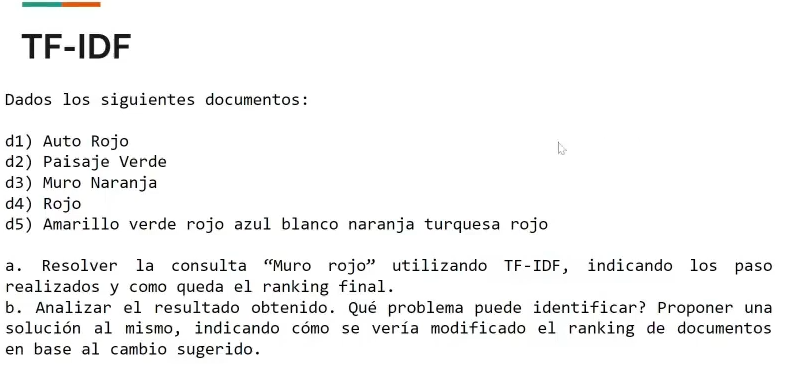

a) Resolver una consulta con TF-IDF es obtener un ranking de documentos más relevantes para la consulta en orden ascendente.

Armaremos una tabla donde las filas son los términos, y las columnas documentos.  
Cada posicion de la tabla tendrá el cálculo de frecuencias para ese término en ese documento. 
Además calcularemos los valores de idf para ese término en la misma tabla.  
N es la cantidad de documentos, en este caso N=5.  
fti es la cantidad de veces que el término i se encuentra en los documentos.
La tabla mencionada es la siguiente

| terminos | 1 | 2 | 3 | 4 | 5 |  Log((N+1)/fti)|
| --- | --- | --- | --- | --- | --- | --- |
| auto | 1 | 0 | 0 | 0 | 0 |Log(6/1):0.78 |
| rojo | 1 | 0 | 0 | 1 | 2 |Log(6/3):0.3 |
| paisaje | 0 | 1 | 0 | 0 | 0 |Log(6/1):0.78 |
| verde | 0 | 1 | 0 | 0 | 1 |Log(6/2):0.48 |
| muro | 0 | 0 | 1 | 0 | 0 |Log(6/1):0.78 |
| naranja | 0 | 0 | 1 | 0 | 1 |Log(6/2):0.48 |
| amarillo | 0 | 0 | 0 | 0 | 1 |Log(6/1):0.78 |
| azul | 0 | 0 | 0 | 0 | 1 |Log(6/1):0.78 |
| blanco | 0 | 0 | 0 | 0 | 1 |Log(6/1):0.78 |
| turquesa | 0 | 0 | 0 | 0 | 1 |Log(6/1):0.78 |

Respecto a la consulta tenemos que calcular para aquellos documentos que tienen los términos "muro rojo" lo siguiente:  
Doc 1: 1x0.3 (rojo) + 0x0.78 (muro) =  0.3  
Doc 3: 0x0.3 (rojo) + 1x0.78 (muro) =  0.78  
Doc 4: 1x0.3 (rojo) + 0x0.78 (muro) =  0.3  
Doc 5: 2x0.3 (rojo) + 0x0.78 (muro) =  0.6  
Orden de los documentos: 1:Doc3, 2:Doc5, 3:Doc1, 3:Doc4

Se puede ver que el documento 5 está segundo simplemente por tener colores y hasta repetidos, y por lo tanto más largo.  
Una solución es normalizar los documentos. Para ello podemos utilizar BM25 con normalización, el cual tiene en cuenta la repetición de los términos en un documento y obviamente normaliza los documentos.

Utilizaremos la siguiente formula para el calculo del puntaje de la consulta para el documento j:  
sum( ftijx(k+1)/(ftij+k(1-b+b*(|dj|/avdl)) ), ti del query, dj el largo del documento j, avdl es la longitud promedio de los documentos
|d1| = 2  
|d2| = 2  
|d3| = 2  
|d4| = 1  
|d5| = 8  
avdl = 15/5 = 3.  
Por ejemplo para el termino rojo en el documento 1 sería 1x(k+1)/(1+k(1-b+bx2/3). Con k= 2, b=0.75 quedaría: 3/2.5=1.2
Idem el resto de términos y documentos
Realizando nuevamente la tabla, quedarRealizandoía de la siguiente forma. k=2,b=0.75

| terminos | 1 | 2 | 3 | 4 | 5 |  Log((N+1)/fti)|
| --- | --- | --- | --- | --- | --- | --- |
| auto | 1.2 | 0.0 | 0.0 | 0.0 | 0.0 |Log(6/1):0.78 |
| rojo | 1.2 | 0.0 | 0.0 | 1.5 | 0.92 |Log(6/3):0.3 |
| paisaje | 0.0 | 1.2 | 0.0 | 0.0 | 0.0 |Log(6/1):0.78 |
| verde | 0.0 | 1.2 | 0.0 | 0.0 | 0.55 |Log(6/2):0.48 |
| muro | 0.0 | 0.0 | 1.2 | 0.0 | 0.0 |Log(6/1):0.78 |
| naranja | 0.0 | 0.0 | 1.2 | 0.0 | 0.55 |Log(6/2):0.48 |
| amarillo | 0.0 | 0.0 | 0.0 | 0.0 | 0.55 |Log(6/1):0.78 |
| azul | 0.0 | 0.0 | 0.0 | 0.0 | 0.55 |Log(6/1):0.78 |
| blanco | 0.0 | 0.0 | 0.0 | 0.0 | 0.55 |Log(6/1):0.78 |
| turquesa | 0.0 | 0.0 | 0.0 | 0.0 | 0.55 |Log(6/1):0.78 |


Podemos ver que:
* el idf no se modifica
* para los documentos 1 al 4, los valores de 1 aumentaron a 1.2
* se redujo el tf para el documento 5.  
En resumen, ahora los documentos más cortos tendrán un mayor puntaje y los largos uno menor

Realizando nuevamente la consulta:  
Doc 1: 1.2x0.3 (rojo) + 0x0.78 (muro) =  0.36  
Doc 3: 0x0.3 (rojo) + 1.2x0.78 (muro) =  0.936  
Doc 4: 1.5x0.3 (rojo) + 0x0.78 (muro) =  0.45  
Doc 5: 0.92x0.3 (rojo) + 0x0.78 (muro) =  0.276  
El nuevo orden de los documentos: 1:Doc3, 2:Doc4, 3:Doc1, 3:Doc5